In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader

import sys, os
sys.path.append('..')
DATADIR = "../data/hiragana73"

from generator import *
from discriminator import *
from trainer import *
from hiragana_dataset import make_hiragana_dataset

In [2]:
import sys
sys.setrecursionlimit(10**7) #再帰回数の上限変更

In [2]:
img_size = 48

plotline = PlotLine2(img_size)

In [74]:
tgt = 'ha'

In [75]:
train_dataset, valid_dataset = make_hiragana_dataset(DATADIR, CATEGORIES=[tgt])
# バッチサイズの指定
batch_size = 1
# DataLoaderを作成
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# 動作確認
# イテレータに変換
batch_iterator = iter(train_dataloader)

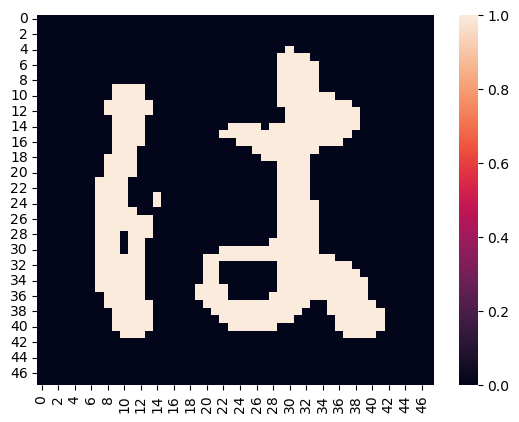

In [86]:
# 1番目の要素を取り出す
inputs, labels = next(batch_iterator)
sns.heatmap(labels.detach().numpy()[0])
plt.show()

In [5]:
mask = nn.Transformer.generate_square_subsequent_mask(16).T

In [6]:
#gen8 = Generator8_2(w_m=0., w_M=4., mask=mask)
# disc7 = Discriminator7(img_size)
disc3 = Discriminator3(img_size)

In [77]:
if not os.path.exists("../model/" + tgt):
    os.mkdir("../model/" + tgt)

In [87]:
gen8 = Generator8_2(w_m=0., w_M=4., mask=mask)
#losses, errors, distances = train1(gen8, disc3, inputs, labels, iteration=5000, lr=0.1) #<--これで「あ」は書ける
#losses, errors, distances = train1_schedule(gen8, disc3, inputs, labels, iteration=4000, start_factor=0.1, end_factor=0.05, total_iters=20)
# losses, errors, distances = train1_schedule5(
#     gen8, disc3, inputs, labels, 
#     iteration=5000, start_factor=0.1, end_factor=0.8, total_iters=40, 
#     start_p=0.5, alpha=400, beta=50
# )
losses, errors, distances = train1_schedule5_2(
    gen8, disc3, inputs, labels, 
    iteration=5000, start_factor=0.1, end_factor=0.8, total_iters=40, 
    start_p=0.5, alpha=400, beta=50,
    folder=tgt
)
# iteration=4000, start_factor=0.1, end_factor=0.01, total_iters=30,

using: cpu
iter: 100, loss: 38814.80663085938
iter: 200, loss: 26985.88015625
iter: 300, loss: 25955.66189453125
iter: 400, loss: 22511.740908203126
iter: 500, loss: 18519.64849609375
iter: 600, loss: 15069.60166015625
iter: 700, loss: 12476.11845703125
iter: 800, loss: 10404.233754882813
iter: 900, loss: 8653.812124023438
iter: 1000, loss: 7118.754816894531
iter: 1100, loss: 5637.142534179688
iter: 1200, loss: 4787.183327636719
iter: 1300, loss: 3927.200104980469
iter: 1400, loss: 3210.4982568359374
iter: 1500, loss: 2800.7389892578126
iter: 1600, loss: 2391.019989013672
iter: 1700, loss: 2156.5362658691406
iter: 1800, loss: 1978.8184289550782
iter: 1900, loss: 1845.663651123047
iter: 2000, loss: 1657.8882739257813
iter: 2100, loss: 1585.357723388672
iter: 2200, loss: 1478.9550744628907
iter: 2300, loss: 1444.6573358154296
iter: 2400, loss: 1357.9915228271484
iter: 2500, loss: 1251.6821655273438
iter: 2600, loss: 1279.5941320800782
iter: 2700, loss: 1207.2964910888672
iter: 2800, loss

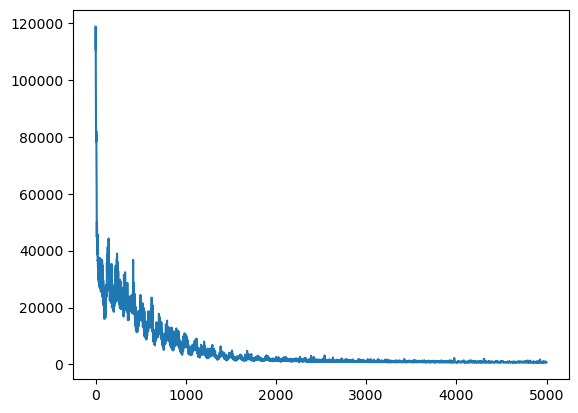

In [88]:
plt.plot(losses)

In [89]:
gen_ = Generator8_2(w_m=0, w_M=4, mask=mask)
gen_.load_state_dict(torch.load("../model/" + tgt + "/best.pt"))

<All keys matched successfully>

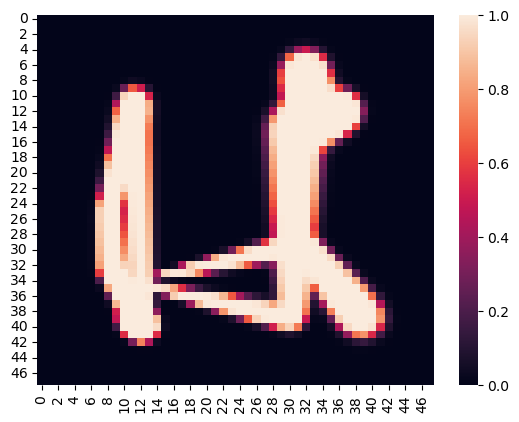

In [90]:
xyw = gen_(inputs)
line = plotline(xyw)
sns.heatmap(line.detach().numpy()[0])
plt.show()

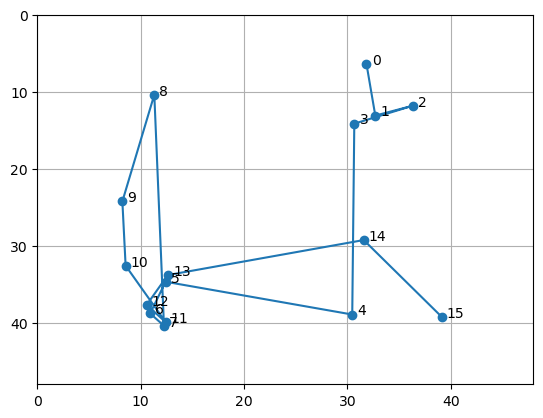

In [91]:
xy = xyw.detach().numpy()[0, :, 0:2]

fig, ax = plt.subplots(1,1)
ax.set_xlim(0, 48)
ax.set_ylim(0, 48)
ax.invert_yaxis()
ax.grid()
ax.plot(xy[:, 1], xy[:, 0], marker='o')
annotations = range(16)
for i, label in enumerate(annotations):
    plt.annotate(label, (xy[:, 1][i]+0.5, xy[:, 0][i]))
plt.show()

In [92]:
torch.save(inputs, "../model/" + tgt + "/input.pt")

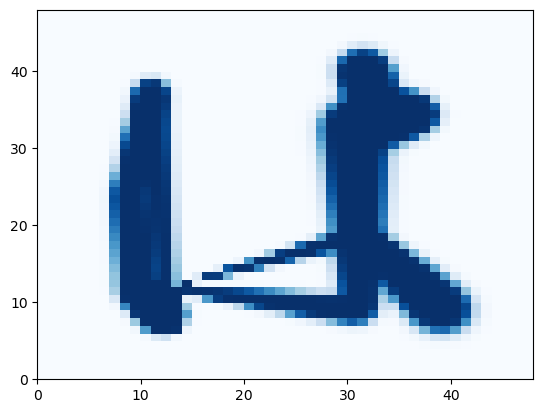

In [107]:
xyw = gen_(inputs)
line = plotline(xyw[:, :16])
plt.pcolor(line.detach().numpy()[0, list(reversed(range(48)))], cmap=plt.cm.Blues)
plt.show()

In [114]:
from matplotlib import animation

In [123]:
xyw = gen_(inputs)

fig = plt.figure()

def init():
    sns.heatmap(np.zeros([48,48]), vmax=1., cbar=False)

def animate(i):
    line_i = plotline(xyw[:, :i+2, :])
    sns.heatmap(line_i.detach().numpy()[0], vmax=1., cbar=False)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=15, repeat=True, interval=1000)

# anim.save("test.gif")

<IPython.core.display.Javascript object>

In [125]:
%matplotlib nbagg
plt.show()